<a href="https://colab.research.google.com/github/shakthi-20/Brain-Stroke-Prediction-using-Logistic-Regression/blob/main/finalbrainstroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import joblib


Logistic regression model

In [2]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# TO DISPLAY
print(data.head())

#PREPROCESSING (changing N/A with mean)
data['bmi'].replace('N/A', np.nan, inplace=True)
data['bmi'] = data['bmi'].astype(float)
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Separate features and target
X = data.drop(['stroke', 'id'], axis=1)  # Drop 'id' and target column 'stroke'
y = data['stroke']

# Split 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#  Model Evaluation
# Predict probabilities and ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


<ipython-input-2-b555cba82a86>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].replace('N/A', np.nan, inplace=True)
<ipython-input-2-b555cba82a86>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Confusion Matrix


In [3]:
# Classification Report
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



In [4]:
from sklearn.metrics import log_loss
loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {loss}")

Log Loss: 0.1782531421164083


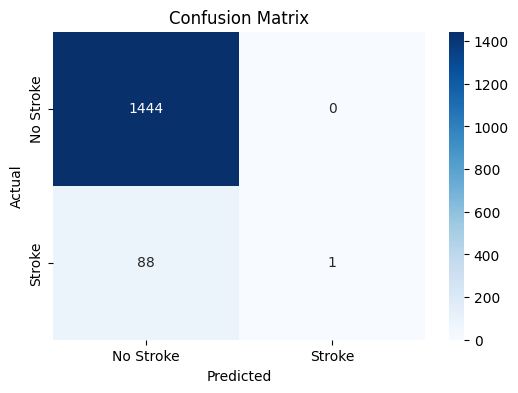

In [5]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification report

ROC Curve

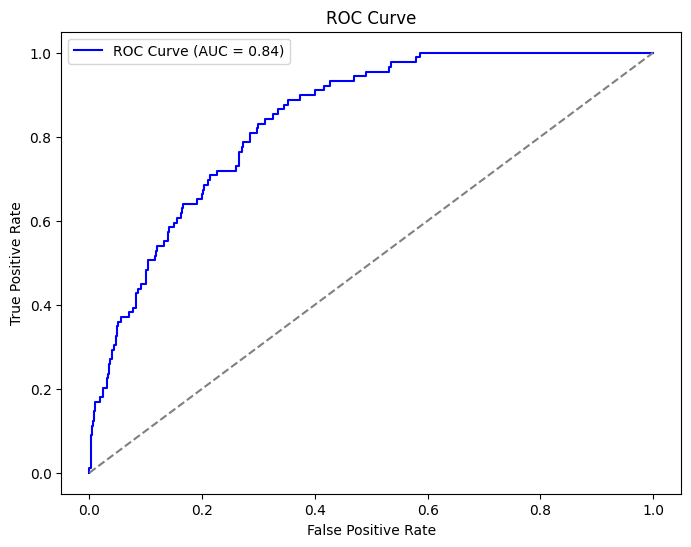

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


 Feature Importance

<ipython-input-7-383916a9a0d9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_sorted, y=importance_sorted.index, palette="viridis")


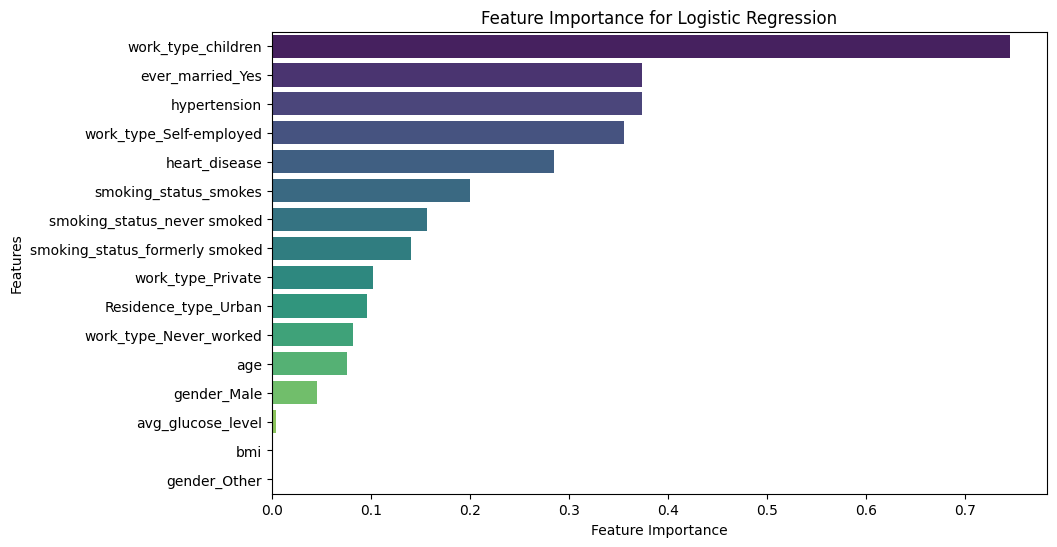

In [7]:

# Extract coefficients and visualize feature importance
importance = pd.Series(model.coef_[0], index=X.columns)
importance_sorted = importance.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_sorted, y=importance_sorted.index, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression')
plt.show()


Heatmap of feature correlations

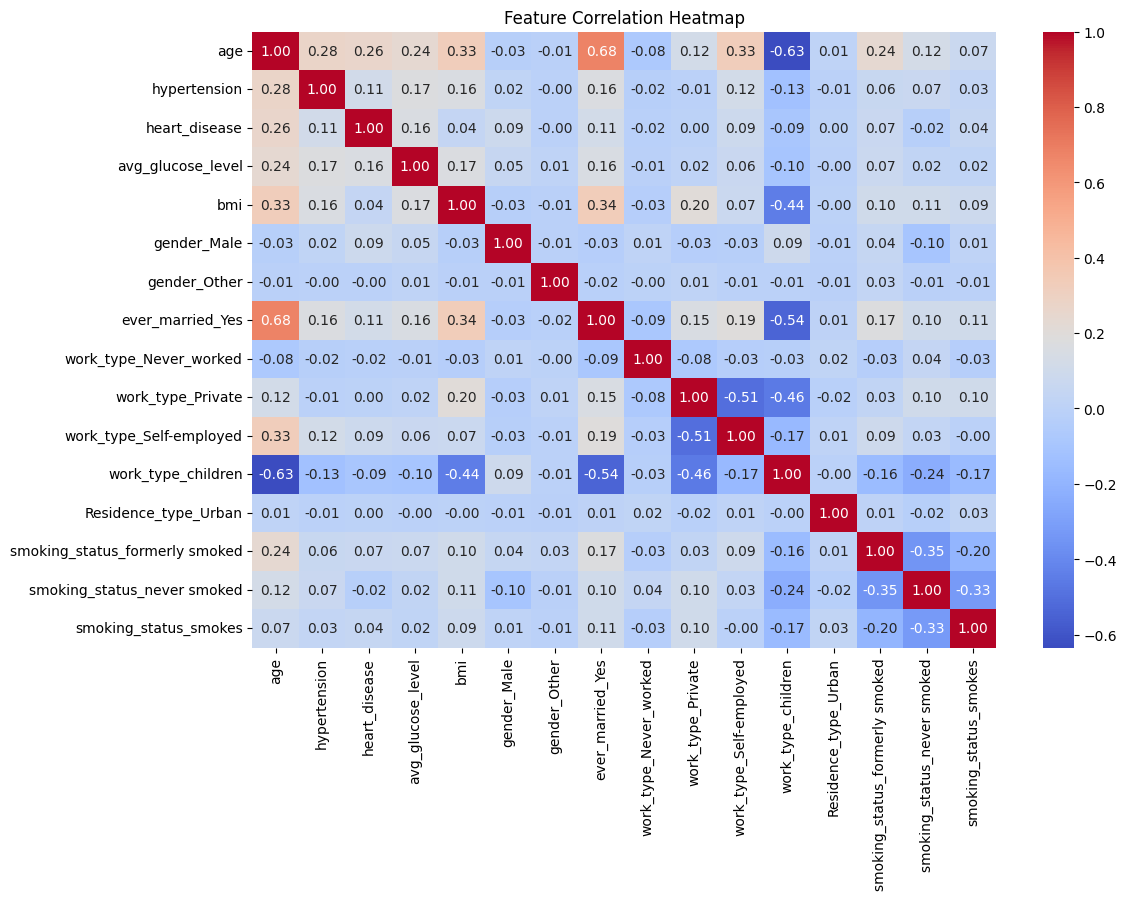

In [8]:


plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

Saving the model as pickle file

In [9]:
joblib.dump(model, 'best_model.pkl')
print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'


In [10]:
model=joblib.load('best_model.pkl')
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Scores: [0.95107632 0.95107632 0.95107632 0.95107632 0.95303327]
Average Accuracy: 0.9514677103718199


In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Model Accuracy:", rf_accuracy)


Random Forest Model Accuracy: 0.9419439008480104


User based input

In [12]:
import joblib

# Load the saved model
best_model = joblib.load('best_model.pkl')

def get_user_input(best_model):
    print("Please enter the following details:")

    # Collect user input
    gender = input("Enter Gender (Female/Male): ")
    age = int(input("Enter your Age: "))
    hypertension = int(input("Do you have Hypertension? (1 for Yes, 0 for No): "))
    heart_disease = int(input("Do you have Heart Disease? (1 for Yes, 0 for No): "))
    ever_married = input("Are you married? (Yes/No): ")
    work_type = input("Enter Work Type (Private/Self-employed/Govt_job/children/Never_worked): ")
    residence_type = input("Enter Residence Type (Urban/Rural): ")
    avg_glucose_level = float(input("Enter your Average Glucose Level: "))

    # User's BMI input handling
    know_bmi = input("Do you know your BMI? (yes/no): ")
    if know_bmi.lower() == 'yes':
        bmi = float(input("Enter your Body Mass Index: "))
    else:
        weight = float(input("Enter your weight in kg: "))
        height = float(input("Enter your height in meters: "))
        bmi = weight / (height ** 2)

    smoking_status = input("Smoking Status (formerly smoked/never smoked/smokes): ")

    # Create a DataFrame for prediction with the user input
    user_data = pd.DataFrame({
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'gender_Female': [1 if gender.lower() == 'female' else 0],
        'gender_Male': [1 if gender.lower() == 'male' else 0],
        'gender_Other': [0],  # Assuming this category wasn't used, set it to 0
        'ever_married_Yes': [1 if ever_married.lower() == 'yes' else 0],
        'work_type_Private': [1 if work_type == 'Private' else 0],
        'work_type_Self-employed': [1 if work_type == 'Self-employed' else 0],
        'work_type_children': [1 if work_type == 'children' else 0],
        'work_type_Never_worked': [1 if work_type == 'Never_worked' else 0],
        'Residence_type_Urban': [1 if residence_type == 'Urban' else 0],
        'smoking_status_formerly smoked': [1 if smoking_status == 'formerly smoked' else 0],
        'smoking_status_never smoked': [1 if smoking_status == 'never smoked' else 0],
        'smoking_status_smokes': [1 if smoking_status == 'smokes' else 0]
    })

    # Ensure all features are present in user_data by aligning with model columns
    model_columns = best_model.feature_names_in_ if hasattr(best_model, 'feature_names_in_') else X.columns
    for col in model_columns:
        if col not in user_data.columns:
            user_data[col] = 0

    # Make prediction
    prediction = best_model.predict(user_data[model_columns])
    risk_probability = best_model.predict_proba(user_data[model_columns])[:, 1][0]

    # Thresholds for risk
    low_threshold = 0.48
    high_threshold = 0.58

    # Set risk level and color code
    if risk_probability > high_threshold:
        risk_level = "You are at high risk of stroke."
        color_code = "\033[91m"  # Red for high risk
    elif risk_probability > low_threshold:
        risk_level = "You are at risk of stroke."
        color_code = "\033[93m"  # Yellow for at risk
    else:
        risk_level = "You are healthy."
        color_code = "\033[92m"  # Green for healthy

    # Display risk level with color code
    print(f"{color_code}{risk_level}\033[0m")  # Color-coded output

    # Personalized recommendations
    recommendations = []
    if hypertension:
        recommendations.append("- Consider monitoring your blood pressure regularly.")
    if heart_disease:
        recommendations.append("- Consult your doctor about heart health and possible lifestyle changes.")
    if smoking_status != "never smoked":
        recommendations.append("- Quitting smoking can significantly reduce your stroke risk.")
    if avg_glucose_level > 140:
        recommendations.append("- Maintain a healthy diet and monitor your blood sugar levels.")
    if bmi >= 25:
        recommendations.append("- Maintaining a healthy weight through diet and exercise is important.")
    if age > 55:
        recommendations.append("- As you are over 55, regular health check-ups are important to monitor your stroke risk.")

    # Display recommendations or a message if none
    if recommendations:
        print("\nPersonalized Health Recommendations:")
        for recommendation in recommendations:
            print(recommendation)
    else:
        print("\nNo specific health recommendations at this time.")

# Call the function to get user input and make a prediction
get_user_input(best_model)


Please enter the following details:
Enter Gender (Female/Male): Male
Enter your Age: 27
Do you have Hypertension? (1 for Yes, 0 for No): 1
Do you have Heart Disease? (1 for Yes, 0 for No): 0
Are you married? (Yes/No): No
Enter Work Type (Private/Self-employed/Govt_job/children/Never_worked): Private
Enter Residence Type (Urban/Rural): Urban
Enter your Average Glucose Level: 120
Do you know your BMI? (yes/no): no
Enter your weight in kg: 72
Enter your height in meters: 1.86
Smoking Status (formerly smoked/never smoked/smokes): smokes
You are healthy.

Personalized Health Recommendations:
- Consider monitoring your blood pressure regularly.
- Quitting smoking can significantly reduce your stroke risk.
